# Geometric Transform, Skewed Text

### Import resources and display image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# %matplotlib inline
%matplotlib qt

# Read in the image
image = cv2.imread('images/skewed_business_card.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

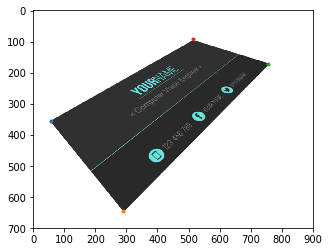

In [3]:
# Plot in this window
%matplotlib inline

# Display image again to plot points on
plt.imshow(image_copy)

# Find and select four points in the source image
# Approximation is okay for this example

plt.plot(57, 356, '.') # top left corner
plt.plot(290, 647, '.') # bottom left corner
plt.plot(755, 171, '.') # bottom right corner
plt.plot(514, 93, '.') # top right corner

### Define the geometric transform

In [4]:
def warp(image):
    
    # Four source coordinates, which defin a rectangular plane
    source_pts = np.float32(
        [[57, 356],
         [290, 647],
         [755, 171],
         [514, 93]])
    
    # Four warped coordinates
    warped_pts = np.float32(
        [[100, 200],
         [100, 550],
         [700, 550],
         [700, 200]])
    
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(source_pts, warped_pts)
    
    # Get the image size (width, height)
    image_size = image.shape[1::-1]
    
    # Compyte and return the warped image
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    
    return warped

### Compute and plot the transformed image

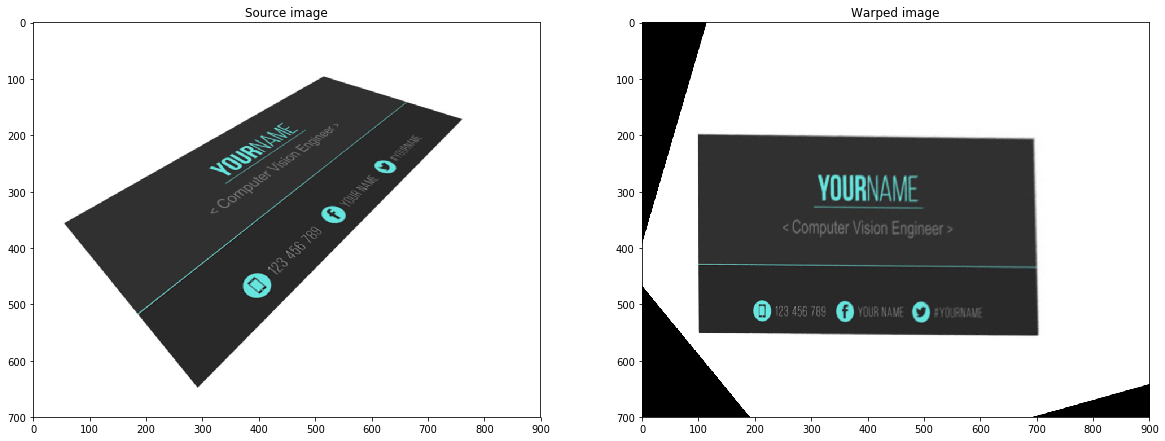

In [5]:
warped_image = warp(image_copy)

# Create side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Source image')
ax1.imshow(image_copy)
ax2.set_title('Warped image')
ax2.imshow(warped_image)